In [80]:
import numpy as np, matplotlib.pyplot as plt, math
from mpl_toolkits import mplot3d
from random import randint
import random
%matplotlib notebook

In [81]:
def magnetic_force(charge,velocity,field): return charge*np.cross(velocity,field)

class particle:
    
    def __init__(self, r, v, q, m):
        self.r, self.v, self.q, self.m = np.asarray(r), np.asarray(v), q, m
        self.history = {'x':[], 'y':[], 'z':[]}
    
    def update(self, field, time_step):
        F =  magnetic_force(self.q, self.v, np.asarray(field))
        self.r = self.r + self.v * np.float64(time_step)
        self.v = self.v + F * np.float64(time_step) / self.m
        self.history['x'].append(self.r[0]), self.history['y'].append(self.r[1])
        self.history['z'].append(self.r[2])
        
    def iterate(self, external_field, elapsed_time, time_step):
        for i in range(elapsed_time): self.update(external_field, time_step)

    ### WARNING: ELAPSED_TIME MUST BE AN INTEGER. 
    ### We should be able to fix this easily with arange().
            
    def plot_trajectory(self):
        ax.plot3D(electron.history['x'], electron.history['y'], \
                  electron.history['z'], 'b-');
class random_particle:
    
    def __init__(self):
        self.r = np.asarray([0.5 - (1.0 * np.random.ranf()),0.5 - \
                            (1.0 * np.random.ranf()),0.5 - (1.0 * np.random.ranf())])
        self.v = np.asarray([1.0 - (2.0 * np.random.ranf()),1.0 - \
                            (2.0 * np.random.ranf()),1.0 - (2.0 * np.random.ranf())])
        self.q = 1 - (2 * np.random.ranf())
        self.m = 0.05 + np.random.ranf()
        self.history = {'x':[], 'y':[], 'z':[]}
        
    def update(self, field, time_step):
        F =  magnetic_force(self.q, self.v, np.asarray(field))
        self.r = self.r + self.v * np.float64(time_step)
        self.v = self.v + F * np.float64(time_step) / self.m
        self.history['x'].append(self.r[0]), self.history['y'].append(self.r[1])
        self.history['z'].append(self.r[2])
        
    def iterate(self, external_field, elapsed_time, time_step):
        for i in range(elapsed_time): self.update(external_field, time_step)

In [82]:
##################  USER PARAMETERS ###########################

external_field = [np.float64(0),np.float64(2),np.float64(5.0)]
time_step = 0.001
elapsed_time = 1000
number_of_particles = 10

###############################################################

In [83]:
randoms = []
# Populate an array with random_particles, iterate over the elapsed time.
for i in range(number_of_particles): randoms.append(random_particle())
for i in range(number_of_particles): randoms[i].iterate(external_field,elapsed_time,time_step)
    

<IPython.core.display.Javascript object>


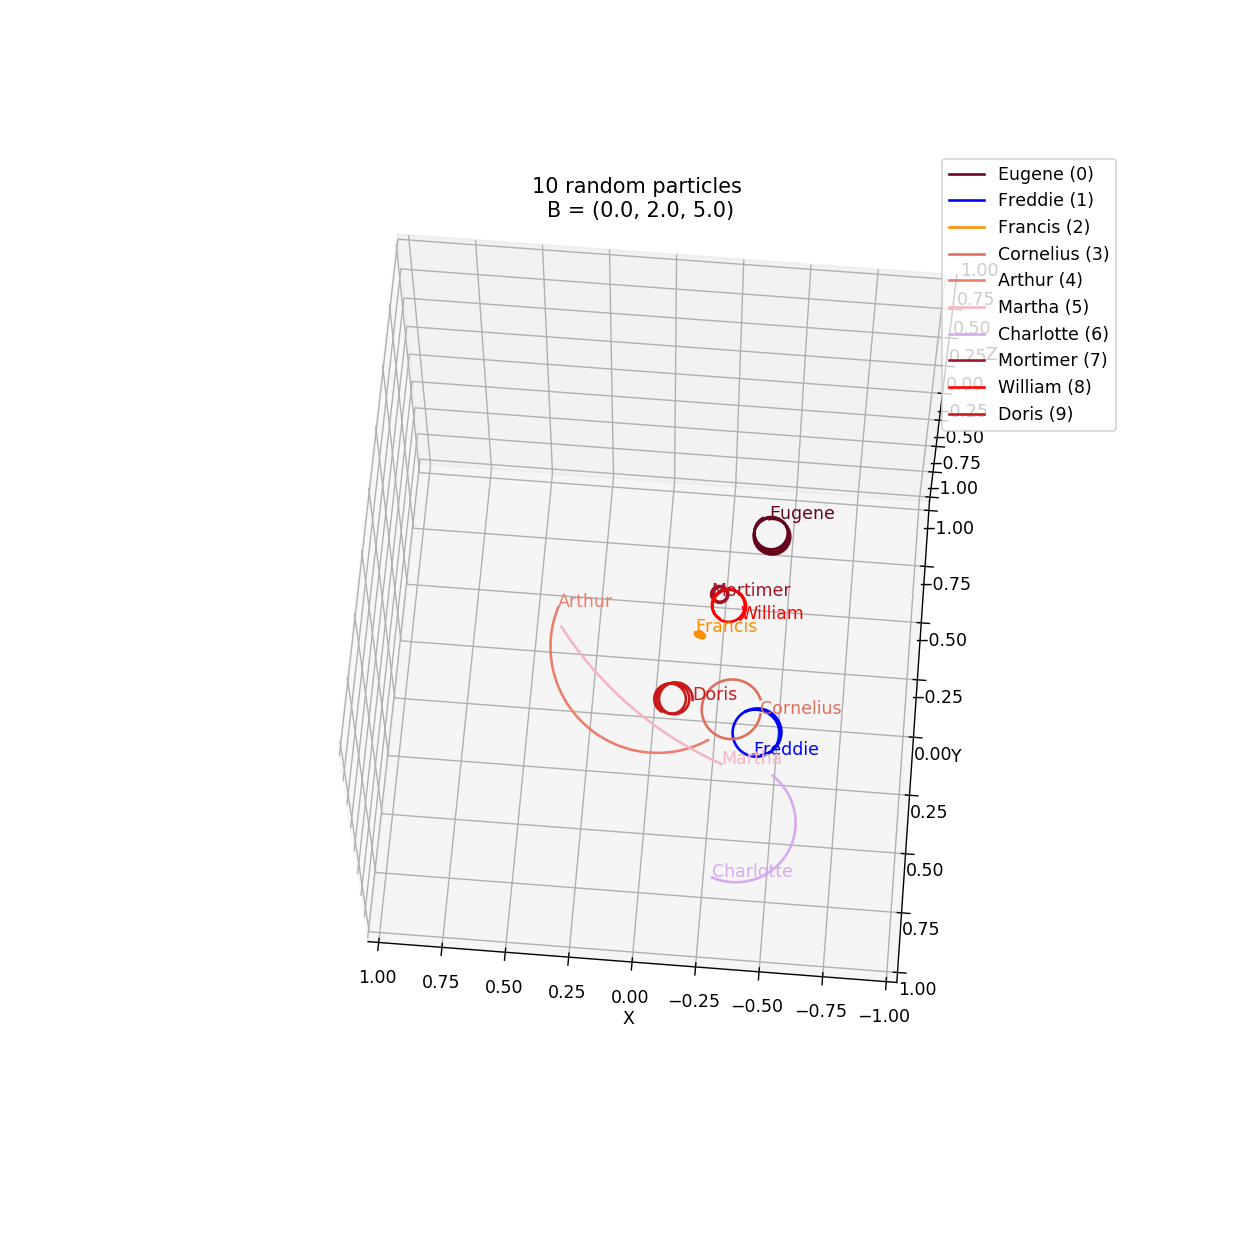

Eugene v_0 = [ 1.29969337  0.03789517 -0.71199295] q = -0.754 m = 0.219 

Freddie v_0 = [ 0.96959257 -0.56450453 -1.08407688] q = 0.857 m = 0.461 

Francis v_0 = [-0.08010174  0.06795343  0.86488997] q = 0.420 m = 0.095 

Cornelius v_0 = [-0.06491837 -0.36334796  0.86386634] q = -0.981 m = 0.914 

Arthur v_0 = [-0.32971622 -0.56684244  1.00336133] q = 0.311 m = 0.669 

Martha v_0 = [-0.76639551  0.18116309 -0.2979436 ] q = -0.040 m = 0.364 

Charlotte v_0 = [ 0.65531691 -0.38496909 -0.42854344] q = 0.487 m = 0.931 

Mortimer v_0 = [-0.18173427  0.5912289  -0.21747949] q = -0.919 m = 0.246 

William v_0 = [ 0.52863751  0.32723069 -0.58066915] q = 0.765 m = 0.365 

Doris v_0 = [ 0.00807823  0.61673252 -1.48623036] q = 0.311 m = 0.099 



In [84]:
colors = ['#b87f86', '#ff8d00', '#cbffe8','#ff00e7',
         '#afaf0a', '#003366', '#83d0f2', '#ea7f6d',
         '#d5aaf0', '#f3b7c3', '#f9b6a1', '#df6f5c',
          'r', '#ca1919', '#a31525','#7f1425', '#65041d',
          '#4d061c', '#ff9e1b', '#e7590e', '#f2671d', 'g', 'b', 'm'
         ]

names = ['Cornelius', 'Mortimer', 'William', 'Albert', 'Freddie',
        'Bernard', 'Martha', 'Chester', 'Clarence', 'Arthur',
        'Ernest', 'Elizabeth', 'Arnold', 'Doris', 'Charles',
        'Charlotte', 'Alice', 'Gertrude', 'Margaret', 'Dorothy',
        'Wallace', 'Eugene', 'Waldo', 'Alfred', 'Bertha', 'Eleanor',
        'Pennyworth', 'Atticus', 'Prescott', 'Francis', 'Theodore',
        ]

chosen_colors, chosen_names = [],[]
for i in range(number_of_particles): 
    chosen_colors.append(random.choice(colors))
    chosen_names.append(random.choice(names))

fig = plt.figure(figsize=(10,10));
ax = plt.axes(projection='3d');
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
for i in range(number_of_particles): 
    ax.plot3D(randoms[i].history['x'], randoms[i].history['y'], \
    randoms[i].history['z'], color = chosen_colors[i], \
    label = chosen_names[i] + " (" + str(i) + ")")
plt.title("%i random particles \n" % number_of_particles + \
          'B = (%.1f' % external_field[0] + ', %.1f, ' % external_field[1] \
          + '%.1f)' % external_field[2])
ax.legend();
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');
for i in range(number_of_particles):
    print(chosen_names[i],'v_0 =', randoms[i].v, \
         "q = %.3f" % randoms[i].q, "m = %.3f" % randoms[i].m, '\n')
    ax.text(randoms[i].r[0], randoms[i].r[1], randoms[i].r[2], chosen_names[i], color=chosen_colors[i])
